In [1]:
#Reading and visualizing LES data using matplotlib and XArray
#Import of modules
import xarray as xr
import pandas as pd
import pyart
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib
import seaborn as sns
from datetime import datetime
from pytz import timezone
from netCDF4 import Dataset
print("pyart.__version__")

/home/zsherman/anaconda3/lib/python3.5/site-packages/pyart/map/grid_mapper.py:40: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  from .ball_tree import BallTree
/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1=

pyart.__version__


In [2]:
#Adding background information on the WRF and NWP
print("The Weather Research and Forecasting (WRF) Model is a numerical weather prediction (NWP) system designed to serve both atmospheric research and operational forecasting needs. NWP refers to the simulation and prediction of the atmosphere with a computer model, and WRF is a set of software for this. WRF features two dynamical (computational) cores (or solvers), a data assimilation system, and a software architecture allowing for parallel computation and system extensibility. The model serves a wide range of meteorological applications across scales ranging from meters to thousands of kilometers.")

The Weather Research and Forecasting (WRF) Model is a numerical weather prediction (NWP) system designed to serve both atmospheric research and operational forecasting needs. NWP refers to the simulation and prediction of the atmosphere with a computer model, and WRF is a set of software for this. WRF features two dynamical (computational) cores (or solvers), a data assimilation system, and a software architecture allowing for parallel computation and system extensibility. The model serves a wide range of meteorological applications across scales ranging from meters to thousands of kilometers.


In [3]:
print("WRF allows researchers to produce simulations reflecting either real data (observations, analyses) or idealized atmospheric conditions. WRF provides operational forecasting a flexible and robust platform, while offering advances in physics, numerics, and data assimilation contributed by the many research community developers. WRF is currently in operational use at NCEP and other forecasting centers internationally. WRF has grown to have a large worldwide community of users (over 23,000 registered users in over 150 countries), and workshops and tutorials are held each year at NCAR. WRF is used extensively for research and real-time forecasting throughout the world.")

WRF allows researchers to produce simulations reflecting either real data (observations, analyses) or idealized atmospheric conditions. WRF provides operational forecasting a flexible and robust platform, while offering advances in physics, numerics, and data assimilation contributed by the many research community developers. WRF is currently in operational use at NCEP and other forecasting centers internationally. WRF has grown to have a large worldwide community of users (over 23,000 registered users in over 150 countries), and workshops and tutorials are held each year at NCAR. WRF is used extensively for research and real-time forecasting throughout the world.


In [4]:
print("WRF offers two dynamical solvers for its computation of the atmospheric governing equations, and the variants of the model are known as WRF-ARW (Advanced Research WRF) and WRF-NMM (Nonhydrostatic Mesoscale Model). The Advanced Research WRF (ARW) is supported to the community by the NCAR Mesoscale and Microscale Meteorology Division. The WRF-NMM solver variant was based on the Eta Model, and later Nonhydrostatic Mesoscale Model, developed at NCEP. The WRF-NMM (NMM) is supported to the community by the Developmental Testbed Center (DTC). NetCDF is a set of software libraries and self-describing, machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data.")

WRF offers two dynamical solvers for its computation of the atmospheric governing equations, and the variants of the model are known as WRF-ARW (Advanced Research WRF) and WRF-NMM (Nonhydrostatic Mesoscale Model). The Advanced Research WRF (ARW) is supported to the community by the NCAR Mesoscale and Microscale Meteorology Division. The WRF-NMM solver variant was based on the Eta Model, and later Nonhydrostatic Mesoscale Model, developed at NCEP. The WRF-NMM (NMM) is supported to the community by the Developmental Testbed Center (DTC). NetCDF is a set of software libraries and self-describing, machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data.


In [21]:
#Importing and reading the datafile

radar = xr.open_dataset('./Documents/Jupyter/wrfout_d01_2004-12-16_00_00_00')

In [6]:
dir(radar)

/home/zsherman/anaconda3/lib/python3.5/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/zsherman/anaconda3/lib/python3.5/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


['ACGRDFLX',
 'ACHFX',
 'ACLHF',
 'ACSNOM',
 'AER_ANGEXP_OPT',
 'AER_ANGEXP_VAL',
 'AER_AOD550_OPT',
 'AER_AOD550_VAL',
 'AER_ASY_OPT',
 'AER_ASY_VAL',
 'AER_OPT',
 'AER_SSA_OPT',
 'AER_SSA_VAL',
 'AER_TYPE',
 'AFWA_CAPE',
 'AFWA_CLOUD_CEIL',
 'AFWA_HAIL',
 'AFWA_LLWS',
 'AFWA_PLFC',
 'AFWA_TORNADO',
 'AFWA_ZLFC',
 'ALBBCK',
 'ALBEDO',
 'BLDT',
 'BL_PBL_PHYSICS',
 'BOTTOM-TOP_GRID_DIMENSION',
 'BOTTOM-TOP_PATCH_END_STAG',
 'BOTTOM-TOP_PATCH_END_UNSTAG',
 'BOTTOM-TOP_PATCH_START_STAG',
 'BOTTOM-TOP_PATCH_START_UNSTAG',
 'BUCKET_J',
 'BUCKET_MM',
 'CANWAT',
 'CEN_LAT',
 'CEN_LON',
 'CF1',
 'CF2',
 'CF3',
 'CFN',
 'CFN1',
 'CLAT',
 'CLDFRA',
 'COSALPHA',
 'COSZEN',
 'CUDT',
 'CU_PHYSICS',
 'DAMPCOEF',
 'DAMP_OPT',
 'DFI_OPT',
 'DIFF_6TH_FACTOR',
 'DIFF_6TH_OPT',
 'DIFF_OPT',
 'DN',
 'DNW',
 'DT',
 'DX',
 'DY',
 'DZS',
 'E',
 'EMISS',
 'F',
 'FEEDBACK',
 'FNM',
 'FNP',
 'GFDDA_END_H',
 'GFDDA_INTERVAL_M',
 'GLW',
 'GMT',
 'GRAUPELNC',
 'GRAV_SETTLING',
 'GRDFLX',
 'GRIDTYPE',
 'GRID_FDDA',

In [7]:
#Listing variables in the datafile
radar.variables

Frozen(OrderedDict([('Times', <xarray.Variable (Time: 6)>
array([b'2004-12-16_00:00:00', b'2004-12-16_00:10:00',
       b'2004-12-16_00:20:00', b'2004-12-16_00:30:00',
       b'2004-12-16_00:40:00', b'2004-12-16_00:50:00'], 
      dtype='|S19')), ('XLAT', <xarray.Variable (Time: 6, south_north: 128, west_east: 128)>
array([[[ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        ..., 
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.]],

       [[ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        ..., 
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.],
        [ 18.,  18.,  18., ...,  18.,  18.,  18.]],

       [[ 18.,  18.,  18., ...,  18., 

In [8]:
radar.coords

Coordinates:
    XLAT              (Time, south_north, west_east) float32 18.0 18.0 18.0 ...
    XLONG             (Time, south_north, west_east) float32 -62.0 -62.0 ...
    XLAT_U            (Time, south_north, west_east_stag) float32 0.0 0.0 ...
    XLONG_U           (Time, south_north, west_east_stag) float32 0.0 0.0 ...
    XLAT_V            (Time, south_north_stag, west_east) float32 0.0 0.0 ...
    XLONG_V           (Time, south_north_stag, west_east) float32 0.0 0.0 ...
  * Time              (Time) int64 0 1 2 3 4 5
  * bottom_top        (bottom_top) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * bottom_top_stag   (bottom_top_stag) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 ...
  * soil_layers_stag  (soil_layers_stag) int64 0 1 2 3 4
  * south_north       (south_north) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * south_north_stag  (south_north_stag) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 ...
  * west_east         (west_east) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 ...
  * west_east_s

In [9]:
#Defining qcloud by placing in an array
#Determine max, min, and mean of qcloud
qcloud = np.array(radar.QCLOUD)
qcloud = qcloud.astype(np.float64)
qcloud_max = np.amax(qcloud)
qcloud_min = np.amin(qcloud)
qcloud_mean = np.mean(qcloud)


print('QCLOUD maximum = %f'%(qcloud_max))
print('QCLOUD minimum = %f'%(qcloud_min))
print('QCLOUD mean = %f'%(qcloud_mean))

QCLOUD maximum = 0.000863
QCLOUD minimum = 0.000000
QCLOUD mean = 0.000000


In [10]:
#Determining where in the array max qcloud occurs
def nanargmax(qcloud):
    idx = np.argmax(qcloud, axis=None)
    multi_idx = np.unravel_index(idx, qcloud.shape)
    if np.isnan(qcloud[multi_idx]):
        nan_count = np.sum(np.isnan(qcloud))
        # In numpy < 1.8 use idx = np.argsort(a, axis=None)[-nan_count-1]
        idx = np.argpartition(qloud, -nan_count-1, axis=None)[-nan_count-1]
        multi_idx = np.unravel_index(idx, qcloud.shape)
    return multi_idx
nanargmax(qcloud)

(3, 24, 72, 85)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.1689999647162409e-11, 2.0156153806681444e-07, 2.0293859221429537e-06, 7.5300340321129456e-06, 1.6508820487318331e-05, 2.6451345062857802e-05, 3.4544802796705035e-05, 4.0509596458826063e-05, 3.9331281153662316e-05, 4.5185389764725569e-05, 7.3757154029246018e-06, 1.3433858230373102e-06, 4.415539014888838e-07, 3.3877575585557922e-07, 2.8998866083847387e-07, 2.521960791678874e-07, 2.070519229900641e-07, 1.8680617527573952e-07, 1.5996605445204126e-07, 1.2566476426999779e-07, 1.1686031919763909e-07, 9.4546765942966153e-08, 6.8912126819172838e-08, 6.0602759487237918e-08, 4.1450234498390764e-08, 3.2441240952596655e-08, 3.49162988947412e-08, 2.8405448663376172e-08, 2.5064584329217506e-08, 2.162593528208324e-08, 2.2115893261092208e-08, 1.7904082215240448e-08, 6.0803457821053238e-09, 9.5547739742789273e-09, 3.8730154669819817e-09, 1.7002009908784179e-09, 2.8635981368905721e-09, 2.6226521073751817e-09, 0.0, 0.0, 0.0, 0.0

24

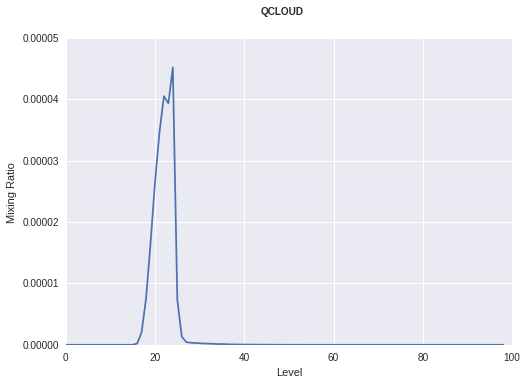

In [22]:
#Determining the mean value of qcloud at each level
mean_qcloud_levels = [qcloud[3,i, :, :].mean() for i in range(qcloud.shape[1])]
print(mean_qcloud_levels)
fig = plt.figure()
plt.plot(mean_qcloud_levels)
fig.suptitle('QCLOUD', fontsize=10, fontweight='bold')
plt.ylabel('Mixing Ratio')
plt.xlabel('Level')
np.argmax(mean_qcloud_levels)

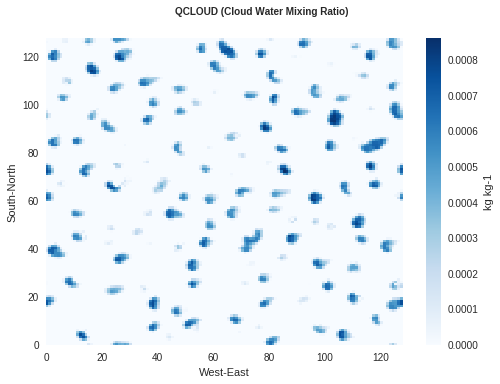

In [12]:
#Plotting qcloud at level 24 when max occurs
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
fig.suptitle('QCLOUD (Cloud Water Mixing Ratio)', fontsize=10, fontweight='bold')
X, Y, Z = axes3d.get_test_data(1.05)
dp0 = qcloud[3][24]
plt.pcolormesh(dp0, cmap='Blues')
cbar = plt.colorbar(orientation='vertical')
plt.xlim(0,128)
plt.ylim(0,128)
plt.ylabel('South-North')
plt.xlabel('West-East')
cbar.set_label('kg kg-1')
plt.show()


In [13]:
#Creating a height array by dividing the sum of PH and PHB by gravity
z_data = np.array(radar.PH + radar.PHB)/9.81
z_data = z_data.astype(np.float64)
z_data

array([[[[    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         ..., 
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ],
         [    0.        ,     0.        ,     0.        , ...,
              0.        ,     0.        ,     0.        ]],

        [[   34.24282074,    34.23299408,    34.21850204, ...,
             34.23143387,    34.23190689,    34.22027969],
         [   34.2413063 ,    34.2317543 ,    34.22423553, ...,
             34.22171783,    34.23505783,    34.23999786],
       

In [14]:
#Creating a U component array
u_data = np.array(radar.U[3, 24, 0:128, 0:128])
u_data.astype(np.float64)
u_data

/home/zsherman/anaconda3/lib/python3.5/site-packages/xarray/core/indexing.py:358: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self.array[key]
/home/zsherman/anaconda3/lib/python3.5/site-packages/xarray/core/indexing.py:358: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self.array[key]
/home/zsherman/anaconda3/lib/python3.5/site-packages/pandas/indexes/base.py:1261: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return promote(getitem(key))
/home/zsherman/anaconda3/lib/python3.5/site-packages/xarray/core/indexing.py:204: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  items = _expand_slice(old_slice, size)[applied_slice]


array([[ -7.80058432,  -7.89846706,  -8.00798702, ...,  -7.14659023,
         -7.51186228,  -7.70930243],
       [ -7.72467375,  -7.85099411,  -7.8932929 , ...,  -7.27256489,
         -7.2424798 ,  -7.49021244],
       [ -8.0894146 ,  -8.0318861 ,  -7.95608473, ...,  -8.01353264,
         -8.07402229,  -8.10287571],
       ..., 
       [ -9.45258713,  -9.15446854,  -8.80591202, ..., -10.43268967,
        -10.5021925 ,  -9.86028385],
       [ -9.47257042,  -9.08606339,  -8.72770309, ..., -10.21524811,
        -10.4217062 ,  -9.92187309],
       [ -8.63528538,  -8.43861294,  -8.37101364, ...,  -8.54443836,
         -9.08758354,  -8.94800377]], dtype=float32)

In [15]:
v_data = np.array(radar.V[3, 24, 0:128, 0:128])
v_data.astype(np.float64)
v_data

/home/zsherman/anaconda3/lib/python3.5/site-packages/xarray/core/indexing.py:358: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self.array[key]
/home/zsherman/anaconda3/lib/python3.5/site-packages/xarray/core/indexing.py:358: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self.array[key]
/home/zsherman/anaconda3/lib/python3.5/site-packages/pandas/indexes/base.py:1261: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return promote(getitem(key))
/home/zsherman/anaconda3/lib/python3.5/site-packages/xarray/core/indexing.py:204: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  items = _expand_slice(old_slice, size)[applied_slice]


array([[-4.65771151, -4.45245457, -4.12577772, ..., -3.79661655,
        -4.32909727, -4.62830257],
       [-4.30832005, -4.10423613, -3.93570185, ..., -3.86525273,
        -4.3296895 , -4.442801  ],
       [-3.82394004, -3.7137754 , -3.67750883, ..., -3.60122681,
        -3.87172484, -3.92961693],
       ..., 
       [-2.67079234, -2.85527921, -3.1867609 , ..., -3.87525845,
        -3.38786626, -2.8333354 ],
       [-3.61232543, -3.64406514, -3.66182208, ..., -3.9595964 ,
        -3.79812193, -3.65384769],
       [-4.42959738, -4.26424789, -3.98662853, ..., -3.67527628,
        -4.04416084, -4.34626961]], dtype=float32)

In [16]:
w_data = np.array(radar.W[3, 24, 0:127, 0:127])
w_data.astype(np.float64)
w_data

array([[-0.07268575,  0.13037339,  0.05146508, ...,  1.131971  ,
         0.59850806, -0.03134073],
       [-0.04700837,  0.03226   , -0.07873507, ..., -0.89690602,
        -0.73709482, -0.59076154],
       [-0.15445258, -0.19700065, -0.28930908, ..., -0.76386893,
        -0.80524933, -0.56996191],
       ..., 
       [-0.01711174, -0.26083419, -0.46453506, ...,  1.65344572,
         0.99835128,  0.76582003],
       [ 0.34249941,  0.09841562,  0.08019819, ...,  0.70161748,
         0.30548817,  0.92031956],
       [ 0.34197176,  0.09799284,  0.18902248, ...,  0.92569727,
         0.46638781,  0.92758751]], dtype=float32)

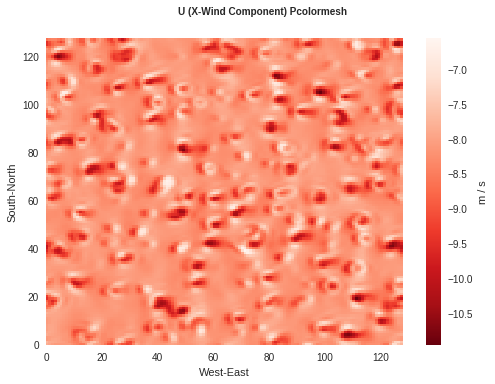

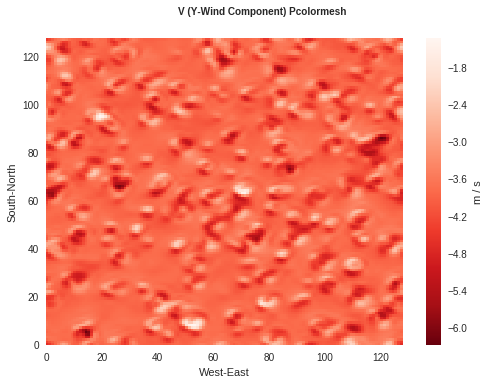

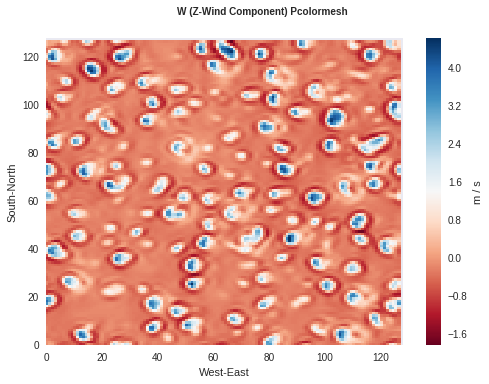

In [17]:
#Pcolormesh for U, V, and W vectors
fig = plt.figure()
plt.pcolormesh(u_data, cmap='Reds_r')
color_bar = plt.colorbar(orientation='vertical')
color_bar.set_label('m / s')
fig.suptitle('U (X-Wind Component) Pcolormesh', fontsize=10, fontweight='bold')
plt.xlim(0,128)
plt.ylim(0,128)
plt.ylabel('South-North')
plt.xlabel('West-East')
plt.show()

fig = plt.figure()
plt.pcolormesh(v_data, cmap='Reds_r')
color_bar = plt.colorbar(orientation='vertical')
color_bar.set_label('m / s')
fig.suptitle('V (Y-Wind Component) Pcolormesh', fontsize=10, fontweight='bold')
plt.xlim(0,128)
plt.ylim(0,128)
plt.ylabel('South-North')
plt.xlabel('West-East')
plt.show()


fig = plt.figure()
plt.pcolormesh(w_data, cmap='RdBu')
color_bar = plt.colorbar(orientation='vertical')
color_bar.set_label('m / s')
fig.suptitle('W (Z-Wind Component) Pcolormesh', fontsize=10, fontweight='bold')
plt.xlim(0,128)
plt.ylim(0,128)
plt.ylabel('South-North')
plt.xlabel('West-East')
plt.show()

In [18]:
#Calulate wind speed from u and v vectors
wind_speed = np.sqrt(u_data**2 + v_data**2)
wind_speed

array([[  9.08533955,   9.06698036,   9.00832367, ...,   8.09246922,
          8.67001534,   8.99191475],
       [  8.84489727,   8.85905552,   8.82008076, ...,   8.23591995,
          8.43799305,   8.7087183 ],
       [  8.94769001,   8.84891605,   8.76489353, ...,   8.78553009,
          8.95433331,   9.00546932],
       ..., 
       [  9.82265377,   9.5894165 ,   9.36480331, ...,  11.12917995,
         11.03511143,  10.25928783],
       [ 10.13797283,   9.78957462,   9.46476269, ...,  10.95580673,
         11.09223557,  10.57327652],
       [  9.70512676,   9.45483971,   9.27184296, ...,   9.30134773,
          9.94682884,   9.94770527]], dtype=float32)

In [19]:
#Calculating wind direction
wind_dir_trig_to = (np.arctan2((u_data/wind_speed), (v_data/wind_speed)))
wind_dir_trig_to_degrees = (wind_dir_trig_to * (180/np.pi))
#Convert this wind vector to the meteorological convention of the direction the wind is coming from.
wind_dir_trig_from_degrees = wind_dir_trig_to_degrees + 180 
#Convert the angle from trig coordinates to cardinal coordinates.
wind_dir_trig_from_degrees
wind_dir_cardinal = 90 - wind_dir_trig_from_degrees
wind_dir_cardinal

array([[ 30.84133148,  29.4104538 ,  27.25787354, ...,  27.97941589,
         29.95491028,  30.9786377 ],
       [ 29.14993286,  27.59906006,  26.50145721, ...,  27.98993683,
         30.87177277,  30.67420197],
       [ 25.30053711,  24.81482697,  24.80760956, ...,  24.19882202,
         25.6190567 ,  25.8717804 ],
       ..., 
       [ 15.77744293,  17.3227005 ,  19.8946228 , ...,  20.37768555,
         17.87900543,  16.03191376],
       [ 20.87413788,  21.85379791,  22.76111603, ...,  21.18714142,
         20.02393341,  20.21682739],
       [ 27.15622711,  26.80863953,  25.46574402, ...,  23.27430725,
         23.99004364,  25.90699768]], dtype=float32)

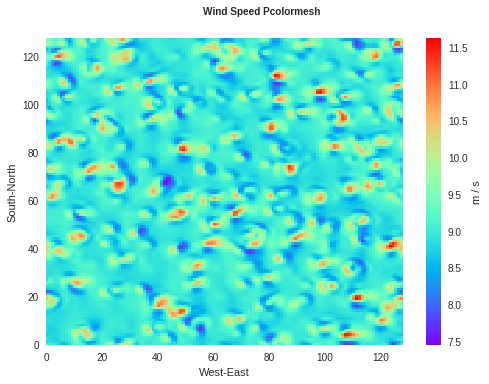

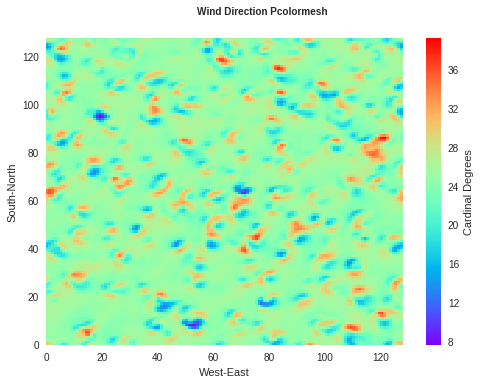

In [20]:
#Plotting wind speed
#Plotting wind direction

ws = wind_speed
wd = wind_dir_cardinal
fig = plt.figure()
plt.pcolormesh(ws, cmap='rainbow')
color_bar = plt.colorbar(orientation='vertical')
color_bar.set_label('m / s')
fig.suptitle('Wind Speed Pcolormesh', fontsize=10, fontweight='bold')
plt.xlim(0,128)
plt.ylim(0,128)
plt.ylabel('South-North')
plt.xlabel('West-East')
plt.show()

fig = plt.figure()
plt.pcolormesh(wd, cmap='rainbow')
color_bar = plt.colorbar(orientation='vertical')
color_bar.set_label('Cardinal Degrees')
fig.suptitle('Wind Direction Pcolormesh', fontsize=10, fontweight='bold')
plt.xlim(0,128)
plt.ylim(0,128)
plt.ylabel('South-North')
plt.xlabel('West-East')
plt.show()